In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [4]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (1).csv


In [10]:
df=pd.read_csv('vgames2.csv', encoding='utf-8')

In [11]:
print(df.shape)
df.head(2)

(16598, 10)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01


In [12]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [13]:
df=df.drop(columns=['Unnamed: 0'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16327 non-null  object
 3   Genre        16548 non-null  object
 4   Publisher    16540 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16596 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [15]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      2
dtype: int64

In [17]:
# 데이터 전처리 및 분석

#- Sales 변수들: dtype을 float로 바꿔줄 수 있도록 K와 M을 제거 -> 단위를 M으로 일치 -> dtype을 object에서 float로 변경
#- Year 칼럼: 4자리가 아닌 값들을 다 4자리로 변경
#- dtype이 Object인 Name, Platform, Genre, Publisher 변수들을 category로 변경할 지 여부를 결정
#- missing values 처리
#- data가 normal distribution인지, skewed 되어 있지 않은지 확인

In [18]:
df.Year.nunique()

63

In [19]:
df.Year.unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', nan, '1984', '1998', '2016', '1985', '1999', '9', '97',
       '1995', '1993', '2012', '1987', '1982', '11', '1994', '1990', '15',
       '1992', '1991', '1983', '1988', '1981', '3', '1989', '96', '6',
       '8', '1986', '1', '5', '4', '10', '98', '7', '16', '86', '14',
       '95', '2017', '1980', '2020', 'Adventure', '2', '13', '0', '12',
       '94'], dtype=object)

In [20]:
df.Year.isna().sum() # Year dtypa은 float, nan값 271개, 연도 앞자리 2개가 없는 데이터들 변환 필요

271

In [21]:
df[df.Year.isnull()].head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


In [22]:
df[(df.Year.isnull())|(df.Genre.isnull())|(df.Publisher.isnull())|df.Other_Sales.isnull()].shape[0] # 총 missing value 개수 359는 전체 데이터의 약 2%이므로 그냥 삭제하기로 한다.

359

In [23]:
df_ToBeDeleted=df[(df.Year.isnull())|(df.Genre.isnull())|(df.Publisher.isnull())|df.Other_Sales.isnull()]
df=df.drop(df_ToBeDeleted.index)
df=df.reset_index(drop=True)
df.shape

(16239, 9)

In [24]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [25]:
df['Year']=df.Year.astype(int)
df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [26]:
Year_new=[]

for i in df.Year:
    if i<23:
        i=i+2000
    elif 23<=i<=99:
        i=i+1900
    else:
        i=i
    Year_new.append(i)

In [27]:
Year_new=pd.DataFrame(Year_new)
df['Year_new']=Year_new
print(df.shape)
df.head(3)

(16239, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_new
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,2008
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,2009
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,2010


In [28]:
df.Year_new.dtype

dtype('int64')

In [29]:
df.Year=df.Year_new

In [30]:
df=df.drop(columns='Year_new')

In [31]:
df.Year.describe()

count    16239.000000
mean      2006.406491
std          5.832376
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [32]:
df.Year.dtype

dtype('int64')

In [33]:
## Sales 칼럼들의 단위가 M인데 K는 M으로 변환되어 있지 않다. 데이터에서 K를 제거하고 단위를 일치시킨다. 데이터에서 문자를 제거한다.

In [34]:
df.NA_Sales=df.NA_Sales.str.replace('M','')
df.EU_Sales=df.EU_Sales.str.replace('M','')
df.JP_Sales=df.JP_Sales.str.replace('M','')
df.Other_Sales=df.Other_Sales.str.replace('M','')

In [35]:
df.NA_Sales.str.contains('M').sum()

0

In [36]:
df.NA_Sales=df.NA_Sales.str.strip()
df.EU_Sales=df.EU_Sales.str.strip()
df.JP_Sales=df.JP_Sales.str.strip()
df.Other_Sales=df.Other_Sales.str.strip()

In [37]:
NA_Sales_new=[]

for i in df.NA_Sales:
    if 'K' in i:
        i=i[:-1]
        i=float(i)
        i=i/1000
    else:
        i=i
    NA_Sales_new.append(i)
    
NA_Sales_new=pd.DataFrame(NA_Sales_new)
df['NA_Sales_new']=NA_Sales_new

EU_Sales_new=[]

for i in df.EU_Sales:
    if 'K' in i:
        i=i[:-1]
        i=float(i)
        i=i/1000
    else:
        i=i
    EU_Sales_new.append(i)
    
EU_Sales_new=pd.DataFrame(EU_Sales_new)
df['EU_Sales_new']=EU_Sales_new

JP_Sales_new=[]

for i in df.JP_Sales:
    if 'K' in i:
        i=i[:-1]
        i=float(i)
        i=i/1000
    else:
        i=i
    JP_Sales_new.append(i)
    
JP_Sales_new=pd.DataFrame(JP_Sales_new)
df['JP_Sales_new']=JP_Sales_new

Other_Sales_new=[]

for i in df.Other_Sales:
    if 'K' in i:
        i=i[:-1]
        i=float(i)
        i=i/1000
    else:
        i=i
    Other_Sales_new.append(i)
    
Other_Sales_new=pd.DataFrame(Other_Sales_new)
df['Other_Sales_new']=Other_Sales_new

In [38]:
df.loc[df.NA_Sales_new.isnull(),'NA_Sales_new']=df.NA_Sales
df.loc[df.EU_Sales_new.isnull(),'EU_Sales_new']=df.EU_Sales
df.loc[df.JP_Sales_new.isnull(),'JP_Sales_new']=df.JP_Sales
df.loc[df.Other_Sales_new.isnull(),'Other_Sales_new']=df.Other_Sales

In [39]:
df.NA_Sales_new=df.NA_Sales_new.astype(float)
df.EU_Sales_new=df.EU_Sales_new.astype(float)
df.JP_Sales_new=df.JP_Sales_new.astype(float)
df.Other_Sales_new=df.Other_Sales_new.astype(float)

In [40]:
df.shape

(16239, 13)

In [41]:
df.NA_Sales=df.NA_Sales_new
df.EU_Sales=df.EU_Sales_new
df.JP_Sales=df.JP_Sales_new
df.Other_Sales=df.Other_Sales_new

In [42]:
df=df.drop(columns=['NA_Sales_new','EU_Sales_new','JP_Sales_new','Other_Sales_new'])

In [43]:
df.NA_Sales=df.NA_Sales*1000000
df.EU_Sales=df.EU_Sales*1000000
df.JP_Sales=df.JP_Sales*1000000
df.Other_Sales=df.Other_Sales*1000000

In [44]:
df['Total_Sales']=df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales

In [45]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object

In [46]:
# 지역별 평균 비교
# * F-test, t-test 수행

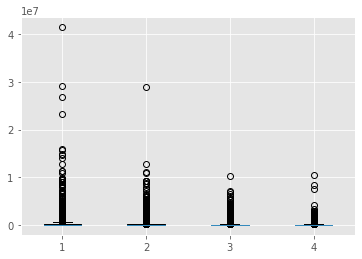

In [47]:
Group_NA=df.NA_Sales
Group_EU=df.EU_Sales
Group_JP=df.JP_Sales
Group_Other=df.Other_Sales

# matplotlib plotting
plot_data=[Group_NA,Group_EU,Group_JP,Group_Other]
ax=plt.boxplot(plot_data)
plt.show();

# F-test, t-test의 전제조건인 정규성이 충족되어 있지 않으므로 이를 수정할 필요가 있다. 

In [48]:
plot_data_DF=pd.DataFrame(plot_data)
plot_data_DF=plot_data_DF.T
plot_data_DF

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,40000.0,0.0,0.0,0.0
1,170000.0,0.0,0.0,10000.0
2,0.0,0.0,20000.0,0.0
3,40000.0,0.0,0.0,0.0
4,120000.0,90000.0,0.0,40000.0
...,...,...,...,...
16234,150000.0,40000.0,0.0,10000.0
16235,10000.0,0.0,0.0,0.0
16236,440000.0,190000.0,30000.0,130000.0
16237,50000.0,50000.0,250000.0,30000.0


In [49]:
plot_data_DF_prelog=plot_data_DF.replace(0.,0.00000000001)
plot_data_DF_prelog

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,4.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11
1,1.700000e+05,1.000000e-11,1.000000e-11,1.000000e+04
2,1.000000e-11,1.000000e-11,2.000000e+04,1.000000e-11
3,4.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11
4,1.200000e+05,9.000000e+04,1.000000e-11,4.000000e+04
...,...,...,...,...
16234,1.500000e+05,4.000000e+04,1.000000e-11,1.000000e+04
16235,1.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11
16236,4.400000e+05,1.900000e+05,3.000000e+04,1.300000e+05
16237,5.000000e+04,5.000000e+04,2.500000e+05,3.000000e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f234129c790>,
      dtype=object)

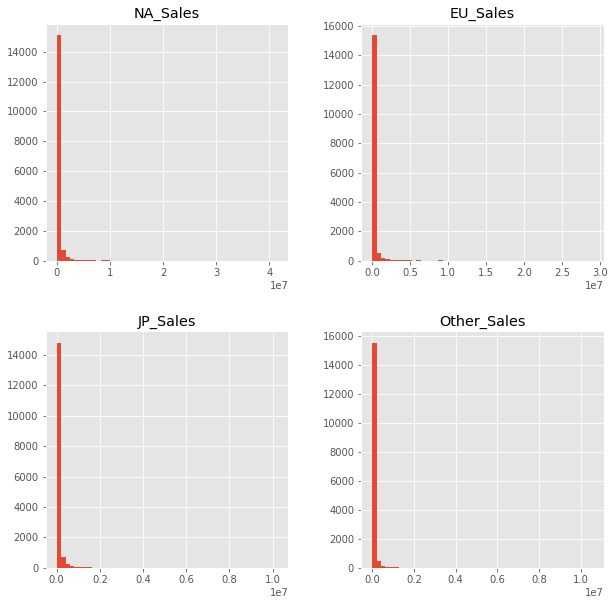

In [50]:
plot_data_DF.hist(bins=50, figsize=(10,10))

In [51]:
# 변수 변환
plot_data_DF_prelog['log_NA_Sales']=np.log(plot_data_DF_prelog.NA_Sales)
plot_data_DF_prelog['log_EU_Sales']=np.log(plot_data_DF_prelog.EU_Sales)
plot_data_DF_prelog['log_JP_Sales']=np.log(plot_data_DF_prelog.JP_Sales)
plot_data_DF_prelog['log_Other_Sales']=np.log(plot_data_DF_prelog.Other_Sales)

In [52]:
plot_data_DF_log=plot_data_DF_prelog.copy()
plot_data_DF_log

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,log_NA_Sales,log_EU_Sales,log_JP_Sales,log_Other_Sales
0,4.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11,10.596635,-25.328436,-25.328436,-25.328436
1,1.700000e+05,1.000000e-11,1.000000e-11,1.000000e+04,12.043554,-25.328436,-25.328436,9.210340
2,1.000000e-11,1.000000e-11,2.000000e+04,1.000000e-11,-25.328436,-25.328436,9.903488,-25.328436
3,4.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11,10.596635,-25.328436,-25.328436,-25.328436
4,1.200000e+05,9.000000e+04,1.000000e-11,4.000000e+04,11.695247,11.407565,-25.328436,10.596635
...,...,...,...,...,...,...,...,...
16234,1.500000e+05,4.000000e+04,1.000000e-11,1.000000e+04,11.918391,10.596635,-25.328436,9.210340
16235,1.000000e+04,1.000000e-11,1.000000e-11,1.000000e-11,9.210340,-25.328436,-25.328436,-25.328436
16236,4.400000e+05,1.900000e+05,3.000000e+04,1.300000e+05,12.994530,12.154779,10.308953,11.775290
16237,5.000000e+04,5.000000e+04,2.500000e+05,3.000000e+04,10.819778,10.819778,12.429216,10.308953


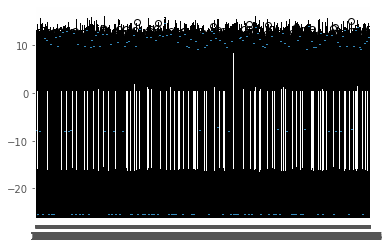

In [106]:
# matplotlib plotting
plot_data_DF_log=plot_data_DF_log[['log_NA_Sales','log_EU_Sales','log_JP_Sales','log_Other_Sales']]
ax=plt.boxplot(plot_data_DF_log)
plt.show();

In [54]:
scaler=StandardScaler()
plot_data_DF_scaled=scaler.fit_transform(plot_data_DF_log)

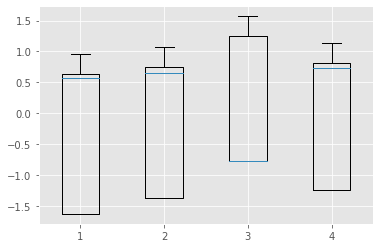

In [55]:
ax=plt.boxplot(plot_data_DF_scaled)
plt.show();

In [56]:
plot_data_DF_scaled

array([[ 0.53196175, -1.37445254, -0.77136072, -1.25157658],
       [ 0.61910965, -1.37445254, -0.77136072,  0.72995588],
       [-1.63180457, -1.37445254,  1.21770881, -1.25157658],
       ...,
       [ 0.67638693,  0.77790258,  1.24059993,  0.87711021],
       [ 0.54540168,  0.70124437,  1.36030249,  0.79298463],
       [-1.63180457, -1.37445254,  1.33510671,  0.72995588]])

In [57]:
plot_data_DF_log.mean()

log_NA_Sales        1.764459
log_EU_Sales       -1.392376
log_JP_Sales      -11.665504
log_Other_Sales    -3.513036
dtype: float64

In [58]:
F_Data=pd.DataFrame({'Sales_mean':[1.764459,-1.392376,-11.665504,-3.513036]},index=[1,2,3,4])
F_Data

,Sales_mean
1,1.764459
2,-1.392376
3,-11.665504
4,-3.513036


In [59]:
plot_data_DF_log.corr()

,log_NA_Sales,log_EU_Sales,log_JP_Sales,log_Other_Sales
log_NA_Sales,1.000000,0.544463,-0.482808,0.578882
log_EU_Sales,0.544463,1.000000,-0.372554,0.533455
log_JP_Sales,-0.482808,-0.372554,1.000000,-0.215996
log_Other_Sales,0.578882,0.533455,-0.215996,1.000000


In [60]:
# 각 지역별 출고량 평균 간의 차이가 통계적으로 유의미한지 여부를 테스트: t-test 결과 모두 유의미

stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_EU_Sales, alternative='greater')

Ttest_indResult(statistic=16.718632603700243, pvalue=8.756415190098021e-63)

In [61]:
stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_JP_Sales, alternative='greater')

Ttest_indResult(statistic=70.49122748353177, pvalue=0.0)

In [62]:
stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_Other_Sales, alternative='greater')

Ttest_indResult(statistic=27.93675623166509, pvalue=4.88034320729299e-170)

In [63]:
# 최근 10년 간의 데이터로 분석 반복
df_10yr=df[(2011<=df.Year)&(df.Year<=2020)]
print(df_10yr.shape)
df_10yr.head(2)

(3867, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0


In [64]:
round(df_10yr.mean(),2)

Year             2012.98
NA_Sales       207207.14
EU_Sales       169764.68
JP_Sales        60636.15
Other_Sales     53891.91
Total_Sales    491499.87
dtype: float64

In [65]:
round(df.mean(),2)

Year             2006.41
NA_Sales       265228.15
EU_Sales       147396.39
JP_Sales        78284.99
Other_Sales     48240.04
Total_Sales    539149.58
dtype: float64

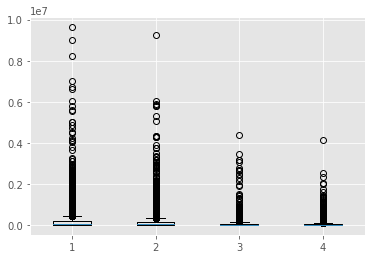

In [66]:
df_10yr=df_10yr.reset_index(drop=True)
Group_NA=df_10yr.NA_Sales
Group_EU=df_10yr.EU_Sales
Group_JP=df_10yr.JP_Sales
Group_Other=df_10yr.Other_Sales

# matplotlib plotting
plot_data=[Group_NA,Group_EU,Group_JP,Group_Other]
ax=plt.boxplot(plot_data)
plt.show();

# F-test, t-test의 전제조건인 정규성이 충족되어 있지 않으므로 이를 수정할 필요가 있다. 

In [67]:
plot_data_DF=pd.DataFrame(plot_data)
plot_data_DF=plot_data_DF.T
plot_data_DF

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,20000.0,10000.0,0.0,0.0
1,40000.0,30000.0,0.0,10000.0
2,0.0,0.0,30000.0,0.0
3,20000.0,0.0,30000.0,0.0
4,0.0,10000.0,0.0,0.0
...,...,...,...,...
3862,0.0,30000.0,0.0,0.0
3863,130000.0,120000.0,0.0,20000.0
3864,70000.0,80000.0,0.0,30000.0
3865,440000.0,190000.0,30000.0,130000.0


In [68]:
plot_data_DF_prelog=plot_data_DF.replace(0.,0.00000000001)
plot_data_DF_prelog

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2.000000e+04,1.000000e+04,1.000000e-11,1.000000e-11
1,4.000000e+04,3.000000e+04,1.000000e-11,1.000000e+04
2,1.000000e-11,1.000000e-11,3.000000e+04,1.000000e-11
3,2.000000e+04,1.000000e-11,3.000000e+04,1.000000e-11
4,1.000000e-11,1.000000e+04,1.000000e-11,1.000000e-11
...,...,...,...,...
3862,1.000000e-11,3.000000e+04,1.000000e-11,1.000000e-11
3863,1.300000e+05,1.200000e+05,1.000000e-11,2.000000e+04
3864,7.000000e+04,8.000000e+04,1.000000e-11,3.000000e+04
3865,4.400000e+05,1.900000e+05,3.000000e+04,1.300000e+05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e2ba5bd0>,
      dtype=object)

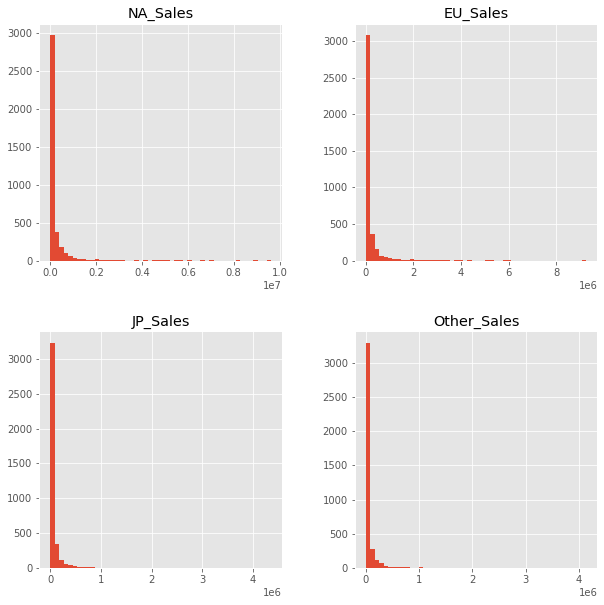

In [69]:
plot_data_DF.hist(bins=50, figsize=(10,10))

In [70]:
# 변수 변환
plot_data_DF_prelog['log_NA_Sales']=np.log(plot_data_DF_prelog.NA_Sales)
plot_data_DF_prelog['log_EU_Sales']=np.log(plot_data_DF_prelog.EU_Sales)
plot_data_DF_prelog['log_JP_Sales']=np.log(plot_data_DF_prelog.JP_Sales)
plot_data_DF_prelog['log_Other_Sales']=np.log(plot_data_DF_prelog.Other_Sales)

In [71]:
plot_data_DF_log=plot_data_DF_prelog.copy()
plot_data_DF_log

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,log_NA_Sales,log_EU_Sales,log_JP_Sales,log_Other_Sales
0,2.000000e+04,1.000000e+04,1.000000e-11,1.000000e-11,9.903488,9.210340,-25.328436,-25.328436
1,4.000000e+04,3.000000e+04,1.000000e-11,1.000000e+04,10.596635,10.308953,-25.328436,9.210340
2,1.000000e-11,1.000000e-11,3.000000e+04,1.000000e-11,-25.328436,-25.328436,10.308953,-25.328436
3,2.000000e+04,1.000000e-11,3.000000e+04,1.000000e-11,9.903488,-25.328436,10.308953,-25.328436
4,1.000000e-11,1.000000e+04,1.000000e-11,1.000000e-11,-25.328436,9.210340,-25.328436,-25.328436
...,...,...,...,...,...,...,...,...
3862,1.000000e-11,3.000000e+04,1.000000e-11,1.000000e-11,-25.328436,10.308953,-25.328436,-25.328436
3863,1.300000e+05,1.200000e+05,1.000000e-11,2.000000e+04,11.775290,11.695247,-25.328436,9.903488
3864,7.000000e+04,8.000000e+04,1.000000e-11,3.000000e+04,11.156251,11.289782,-25.328436,10.308953
3865,4.400000e+05,1.900000e+05,3.000000e+04,1.300000e+05,12.994530,12.154779,10.308953,11.775290


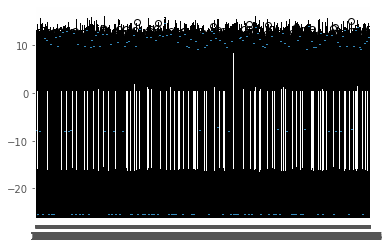

In [107]:
# matplotlib plotting
plot_data_DF_log=plot_data_DF_log[['log_NA_Sales','log_EU_Sales','log_JP_Sales','log_Other_Sales']]
ax=plt.boxplot(plot_data_DF_log)
plt.show();

In [73]:
plot_data_DF.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.783482,0.233469,0.772172
EU_Sales,0.783482,1.000000,0.246204,0.950011
JP_Sales,0.233469,0.246204,1.000000,0.197585
Other_Sales,0.772172,0.950011,0.197585,1.000000


In [74]:
# 각 지역별 출고량 평균 간의 차이가 통계적으로 유의미한지 여부를 테스트: t-test 결과 북미와 유럽 간의 차이는 통계적으로 유의미하지 않은 반면 나머지 관계는 유의미하였다.

stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_EU_Sales, alternative='greater')

Ttest_indResult(statistic=-3.096236961614052, pvalue=0.9990165252710187)

In [75]:
stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_JP_Sales, alternative='greater')

Ttest_indResult(statistic=9.865513769423924, pvalue=4.0037590621859314e-23)

In [76]:
stats.ttest_ind(plot_data_DF_log.log_NA_Sales, plot_data_DF_log.log_Other_Sales, alternative='greater')

Ttest_indResult(statistic=1.7954500517072598, pvalue=0.036310529262253054)

Text(0.5, 1.0, '40 Years')

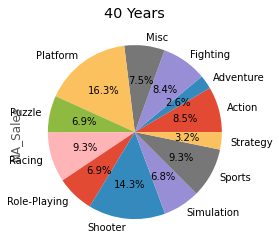

In [77]:
# 지역별 선호 게임 장르
NA_Genre=df.groupby('Genre').NA_Sales.mean()
NA_Genre.plot.pie(autopct="%.1f%%")
plt.title('40 Years')

Text(0.5, 1.0, '10 Years')

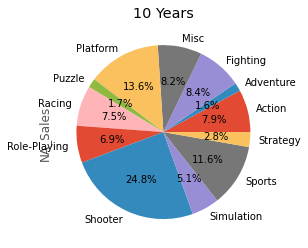

In [78]:
NA_Genre_10yr=df_10yr.groupby('Genre').NA_Sales.mean()
NA_Genre_10yr.plot.pie(autopct="%.1f%%")
plt.title('10 Years')

Text(0.5, 1.0, '40 Years')

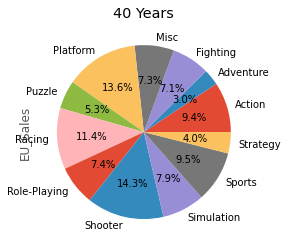

In [79]:
NA_Genre=df.groupby('Genre').EU_Sales.mean()
NA_Genre.plot.pie(autopct="%.1f%%")
plt.title('40 Years')

Text(0.5, 1.0, '10 Years')

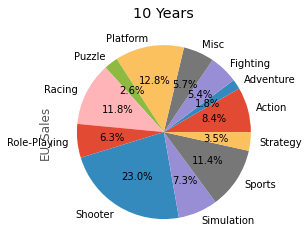

In [80]:
NA_Genre_10yr=df_10yr.groupby('Genre').EU_Sales.mean()
NA_Genre_10yr.plot.pie(autopct="%.1f%%")
plt.title('10 Years')

Text(0.5, 1.0, '40 Years')

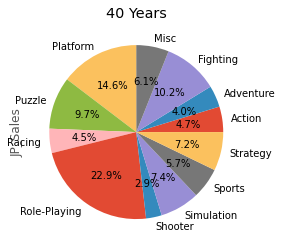

In [81]:
NA_Genre=df.groupby('Genre').JP_Sales.mean()
NA_Genre.plot.pie(autopct="%.1f%%")
plt.title('40 Years')

Text(0.5, 1.0, '10 Years')

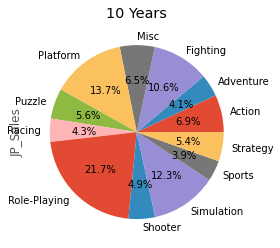

In [82]:
NA_Genre_10yr=df_10yr.groupby('Genre').JP_Sales.mean()
NA_Genre_10yr.plot.pie(autopct="%.1f%%")
plt.title('10 Years')

Text(0.5, 1.0, '40 Years')

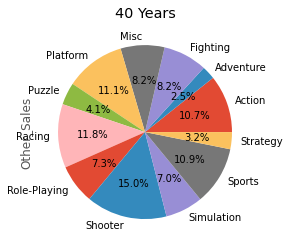

In [83]:
NA_Genre=df.groupby('Genre').Other_Sales.mean()
NA_Genre.plot.pie(autopct="%.1f%%")
plt.title('40 Years')

Text(0.5, 1.0, '10 Years')

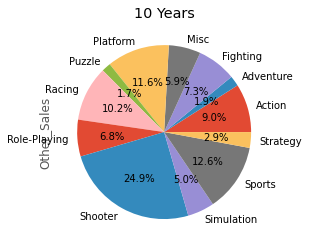

In [84]:
NA_Genre_10yr=df_10yr.groupby('Genre').Other_Sales.mean()
NA_Genre_10yr.plot.pie(autopct="%.1f%%")
plt.title('10 Years')

Text(0.5, 1.0, '40 Years')

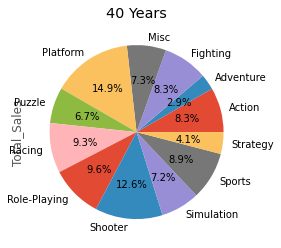

In [85]:
NA_Genre=df.groupby('Genre').Total_Sales.mean()
NA_Genre.plot.pie(autopct="%.1f%%")
plt.title('40 Years')

Text(0.5, 1.0, '10 Years')

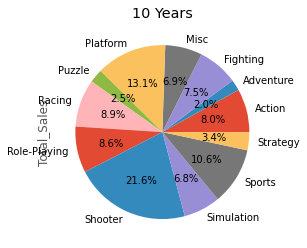

In [86]:
NA_Genre_10yr=df_10yr.groupby('Genre').Total_Sales.mean()
NA_Genre_10yr.plot.pie(autopct="%.1f%%")
plt.title('10 Years')

In [87]:
# 지역별 선호하는 게임 플랫폼
Platform_PC_Console=[]

for i in df.Platform:
    if i=='PC':
        i='PC'
    else:
        i='Console'
    Platform_PC_Console.append(i)
    
Platform_PC_Console=pd.DataFrame(Platform_PC_Console)
df['Platform_PC_Console']=Platform_PC_Console

In [88]:
Platform_PC_Console=[]

for i in df_10yr.Platform:
    if i=='PC':
        i='PC'
    else:
        i='Console'
    Platform_PC_Console.append(i)
    
Platform_PC_Console=pd.DataFrame(Platform_PC_Console)
df_10yr['Platform_PC_Console']=Platform_PC_Console

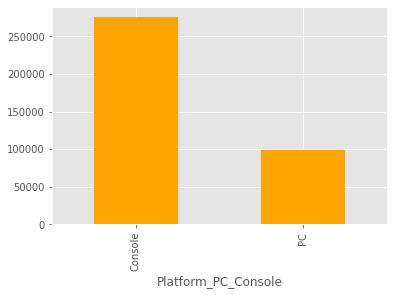

In [89]:
NA_Platform=df.groupby('Platform_PC_Console').NA_Sales.mean()
NA_Platform.plot.bar(color='orange')

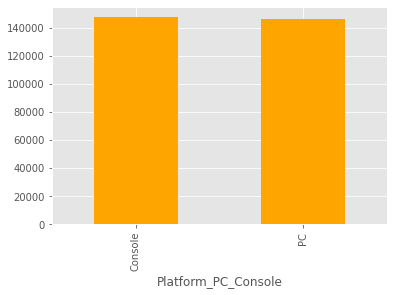

In [90]:
EU_Platform=df.groupby('Platform_PC_Console').EU_Sales.mean()
EU_Platform.plot.bar(color='orange')

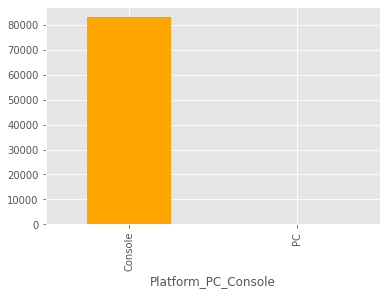

In [91]:
JP_Platform=df.groupby('Platform_PC_Console').JP_Sales.mean()
JP_Platform.plot.bar(color='orange')

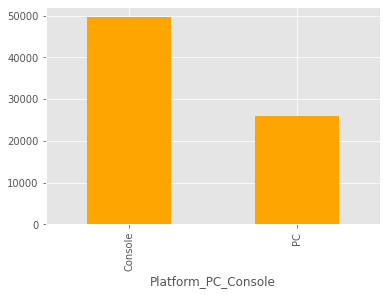

In [92]:
Other_Platform=df.groupby('Platform_PC_Console').Other_Sales.mean()
Other_Platform.plot.bar(color='orange')

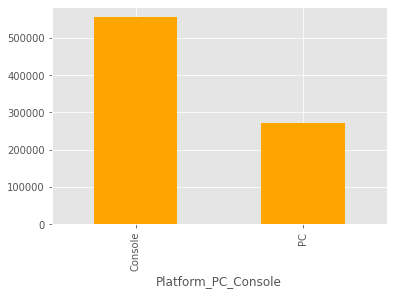

In [93]:
Global_Platform=df.groupby('Platform_PC_Console').Total_Sales.mean()
Global_Platform.plot.bar(color='orange')

In [94]:
df['Number']=range(1,16240)
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales',
       'Platform_PC_Console', 'Number'],
      dtype='object')

In [95]:
df_10yr['Number']=range(1,3868)
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales',
       'Platform_PC_Console', 'Number'],
      dtype='object')

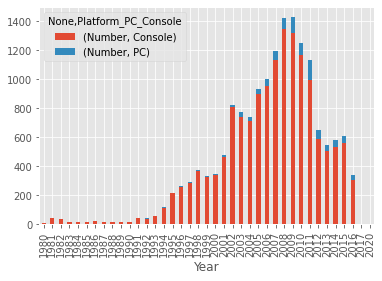

In [96]:
Year_df=df[['Year','Platform_PC_Console','Number']].groupby(['Year','Platform_PC_Console']).count().unstack()
Year_df.plot.bar(stacked=True)

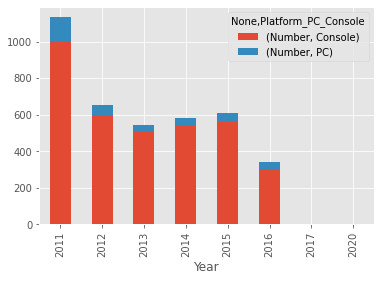

In [97]:
Year_df_10yr=df_10yr[['Year','Platform_PC_Console','Number']].groupby(['Year','Platform_PC_Console']).count().unstack()
Year_df_10yr.plot.bar(stacked=True)

In [98]:
df_10yr.sort_values('Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_PC_Console,Number
794,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0,Console,795
2537,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0,Console,2538
640,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0,Console,641
2112,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000.0,5810000.0,350000.0,2310000.0,14240000.0,Console,2113
961,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000.0,5880000.0,650000.0,2520000.0,14040000.0,Console,962
1493,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000.0,4300000.0,70000.0,1120000.0,13740000.0,Console,1494
3279,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000.0,5820000.0,490000.0,1620000.0,13470000.0,Console,3280
2585,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000.0,3910000.0,2670000.0,890000.0,12210000.0,Console,2586
472,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000.0,5810000.0,360000.0,2020000.0,11990000.0,Console,473
969,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000.0,3370000.0,3080000.0,650000.0,11330000.0,Console,970


In [99]:
df.sort_values('Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_PC_Console,Number
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,Console,2856
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,Console,4114
12315,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0,Console,12316
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0,Console,3289
7672,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0,Console,7673
1187,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0,Console,1188
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0,Console,6797
2959,Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0,Console,2960
16174,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0,Console,16175
10279,Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0,Console,10280


In [100]:
YrBefore2010=df.Number[df.Year<=2010].count()
YrAfter2010=df.Number[df.Year>2010].count()
print(YrBefore2010, YrAfter2010)
round(YrBefore2010/len(df),2), round(YrAfter2010/len(df),2)

12372 3867


(0.76, 0.24)

In [101]:
df_top10=df[['Name','Genre','NA_Sales','EU_Sales','Total_Sales']].sort_values('Total_Sales',ascending=False).head(10)

In [102]:
df_10yr_top10=df_10yr[['Name','Genre','NA_Sales','EU_Sales','Total_Sales']].sort_values('Total_Sales',ascending=False).head(10)

In [103]:
Genre_Total_Sales=df.groupby('Genre').Total_Sales.mean()
Genre_Total_Sales

Genre
Action          528697.530864
Adventure       184755.134281
Fighting        531185.628743
Misc            463831.052945
Platform        948442.153494
Puzzle          425318.021201
Racing          592739.950779
Role-Playing    615365.187713
Shooter         800585.937500
Simulation      460141.843972
Sports          567785.993910
Strategy        258565.022422
Name: Total_Sales, dtype: float64

In [104]:
Genre_NA_Sales=df.groupby('Genre').NA_Sales.mean()
Genre_NA_Sales.sort_values(ascending=False)

Genre
Platform        510171.821306
Shooter         448812.500000
Racing          290976.210008
Sports          290239.234450
Action          265046.296296
Fighting        263892.215569
Misc            234818.560381
Role-Playing    217583.617747
Puzzle          214805.653710
Simulation      214456.264775
Strategy        101390.134529
Adventure        80402.843602
Name: NA_Sales, dtype: float64

In [105]:
Genre_EU_Sales=df.groupby('Genre').EU_Sales.mean()
Genre_EU_Sales.sort_values(ascending=False)

Genre
Shooter         242367.187500
Platform        229816.723940
Racing          192797.374897
Sports          161361.461505
Action          158530.864198
Simulation      133557.919622
Role-Playing    124976.109215
Misc            123825.104105
Fighting        119640.718563
Puzzle           89169.611307
Strategy         66995.515695
Adventure        50284.360190
Name: EU_Sales, dtype: float64